# P15/144891/2022 - OKELLO DAVID OMONDI

# ✅ STEP 1: Load and Understand the Dataset
## 🧾 What I'm doing:
    1. Open the dataset.
    2. See what’s inside.
    3. Check for missing values.

In [1]:
import pandas as pd

# Load the dataset with proper encoding
df = pd.read_csv(r'C:\Users\User\Downloads\archive\flipkart_product.csv', encoding='latin-1')

# See first few rows
print(df.head())

# Dataset summary
print(df.info())

# Missing values check
print(df.isnull().sum())

                                         ProductName     Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   

            Review                                            Summary  
0           Super!  Great cooler.. excellent air flow and for this...  
1          Awesome             Best budget 2 fit cooler. Nice cooling  
2             Fair  The quality is good but the power of air is de...  
3  Useless product                 Very bad product it's a only a fan  
4             Fair                                      Ok ok product  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Coun

## 🧠 What to look for:
 - Columns: ProductName, Price, Rate, Review, Summary
 - Null values in Price, Rate, Review, Summary
 - Everything is in string (text) format

# ✅ STEP 2: Clean and Prepare the Data
## 🧾 What I'm doing:
 1. Fix the data types (convert text to numbers).
 2. Remove or fix rows with missing data.
 3. Clean the text (remove symbols, lower case).

In [3]:
import re

# 1. Remove ₹ and convert price to float
df['Price'] = df['Price'].str.replace(r'[^0-9.]', '', regex=True).astype(float)

# 2. Extract float from rate like '4.2★'
df['Rate'] = df['Rate'].str.extract(r'([\d\.]+)').astype(float)

# 3. Drop rows with missing Review, Price, or Rate
df.dropna(subset=['Review', 'Price', 'Rate'], inplace=True)

# 4. Fill missing Summary with first 50 characters of Review
df['Summary'] = df['Summary'].fillna(df['Review'].str[:50])

# 5. Clean text fields
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Review_clean'] = df['Review'].apply(clean_text)
df['Summary_clean'] = df['Summary'].apply(clean_text)

In [37]:
print(df.head())
print(df.tail())

                                         ProductName   Price  Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0   5.0   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0   5.0   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0   3.0   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0   1.0   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  3999.0   3.0   

            Review                                            Summary  \
0           Super!  Great cooler.. excellent air flow and for this...   
1          Awesome             Best budget 2 fit cooler. Nice cooling   
2             Fair  The quality is good but the power of air is de...   
3  Useless product                 Very bad product it's a only a fan   
4             Fair                                      Ok ok product   

      Review_clean                                      Summary_clean  \
0            super  great cooler excellent air flow and for this p.

# ✅ STEP 3: Exploratory Data Analysis (EDA)
## 🧾 What I'm doing:
 - Explore the data to understand patterns.

## 📊 What to explore:
 1. Rating Distribution – Are most reviews positive?
 2. Review Length – How long are reviews?
 3. Price vs. Rating – Any pattern?

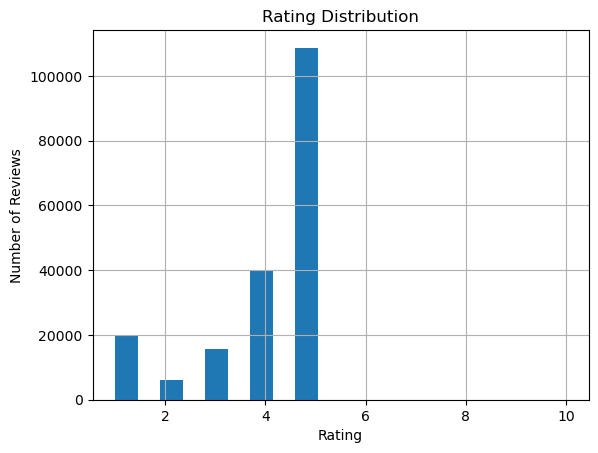

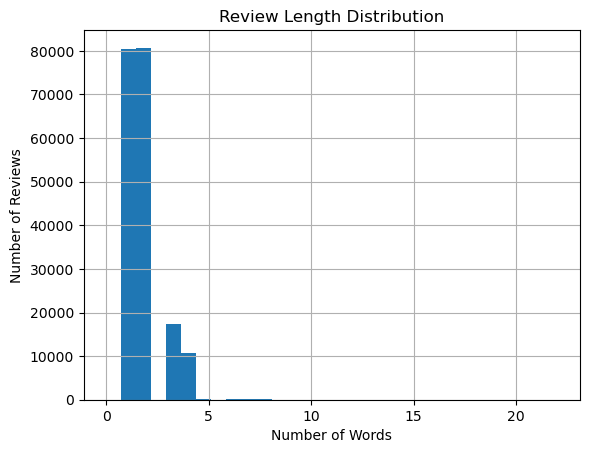

In [8]:
import matplotlib.pyplot as plt

# Rating distribution
df['Rate'].hist(bins=20)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

# Review length distribution
df['review_length'] = df['Review_clean'].apply(lambda x: len(x.split()))
df['review_length'].hist(bins=30)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

# ✅ STEP 4: Sentiment Analysis (Classifying Positive/Negative Reviews)
## 🧾 What I'm doing:
 - Convert ratings to labels:
   - Rating >= 4 → Positive (1)
   - Rating < 4 → Negative (0)
 - Train a model to predict sentiment from reviews. (Using tensorflow)

In [15]:
# Recommended in Jupyter to ensure you install into the right environment:
%pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 2.1/376.0 MB 8.4 MB/s eta 0:00:45
   ---------------------------------------- 4.5/376.0 MB 8.7 MB/s eta 0:00:43
    --------------------------------------- 6.6/376.0 MB 8.9 MB/s eta 0:00:42
    --------------------------------------- 9.2/376.0 MB 9.8 MB/s eta 0:00:38
   - -------------------------------------- 11.3/376.0 MB 9.9 MB/s eta 0:00:37
   - -------------------------------------- 13.6/376.0 MB 10.2 MB/s eta 0:00:36
   - -------------------------------------- 15.7/376.0 MB 10.2 MB/s eta 0:00:36
   - -------------------------------------- 18.1/376.0 MB 10.3 MB/s eta 0:00:35
   -- ------------------------------------- 20.4/376.0 MB 10.4 MB/s eta 0:00:35
   -- ------------------------------------- 22.8/376.0 MB 10.5 MB/s eta 0:00:34
   -- ------------------------------------- 25.2/376.0 MB 10

In [20]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Create sentiment label
df['label'] = df['Rate'].apply(lambda x: 1 if x >= 4 else 0)

# Train/test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Review_clean'], df['label'], test_size=0.2, random_state=42
)

# Tensorflow dataset
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((train_texts.values, train_labels.values)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((test_texts.values, test_labels.values)).batch(batch_size)

# Text vectorization
from tensorflow.keras.layers import TextVectorization

max_features = 10000
sequence_length = 100

vectorizer = TextVectorization(max_tokens=max_features, output_sequence_length=sequence_length)
vectorizer.adapt(train_texts.values)

# Build model
model = tf.keras.Sequential([
    vectorizer,
    tf.keras.layers.Embedding(max_features, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(train_ds, validation_data=test_ds, epochs=3)


Epoch 1/3
4747/4747 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8569 - loss: 0.3328 - val_accuracy: 0.9668 - val_loss: 0.0913
Epoch 2/3
4747/4747 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9517 - loss: 0.1125 - val_accuracy: 0.9671 - val_loss: 0.0900
Epoch 3/3
4747/4747 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9557 - loss: 0.1025 - val_accuracy: 0.9673 - val_loss: 0.1011


# ✅ STEP 5: Topic Modeling (Detect Business Pain Points)
## 🧾 What we’re doing:
 - Discover themes in reviews (e.g. service, delivery, quality).
 - Use LDA (Latent Dirichlet Allocation) from gensim.

In [26]:
from gensim import corpora, models
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenize reviews
texts = [word_tokenize(text) for text in df['Review_clean']]

# Build dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=10)

# Show topics
topics = lda.print_topics()
for topic in topics:
    print(topic)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


(0, '0.212*"product" + 0.064*"the" + 0.063*"good" + 0.048*"brilliant" + 0.048*"great" + 0.048*"buy" + 0.047*"best" + 0.047*"must" + 0.047*"in" + 0.046*"market"')
(1, '0.187*"awesome" + 0.181*"purchase" + 0.177*"good" + 0.091*"simply" + 0.089*"mindblowing" + 0.060*"pretty" + 0.036*"okay" + 0.035*"just" + 0.022*"worst" + 0.022*"experience"')
(2, '0.142*"worth" + 0.139*"wonderful" + 0.100*"recommended" + 0.094*"money" + 0.086*"every" + 0.086*"penny" + 0.085*"highly" + 0.056*"the" + 0.038*"waste" + 0.020*"of"')
(3, '0.200*"nice" + 0.124*"excellent" + 0.124*"fabulous" + 0.099*"product" + 0.076*"really" + 0.048*"not" + 0.046*"fair" + 0.027*"expectations" + 0.027*"meet" + 0.027*"did"')
(4, '0.265*"terrific" + 0.140*"nan" + 0.138*"super" + 0.137*"just" + 0.136*"wow" + 0.092*"choice" + 0.082*"valueformoney" + 0.001*"this" + 0.001*"range" + 0.000*"stars"')


### Interpreting the LDA Topics
📌 The LDA algorithm discovered 5 main topics in the reviews.

🔵 Topic 0 – General Market Praise
```product, brilliant, great, buy, best, market```
🧠 Interpretation: People like the product overall and think it’s one of the best in the market — possibly pointing to a strong competitive edge.

🔵 Topic 1 – Enthusiastic Purchase Experience
```awesome, purchase, mindblowing, pretty, okay, just, worst, experience```
🧠 Interpretation: This reflects emotional language — mostly positive (awesome, mindblowing), with slight hints of mixed experiences (worst, okay, just). These reviews describe the buyer's journey.

🔵 Topic 2 – Value for Money
```worth, wonderful, recommended, money, penny, waste, highly```
🧠 Interpretation: These users talk about money and value. Positive and negative sentiments are both present (worth every penny vs. waste of money).

🔵 Topic 3 – Product Quality and Fit
```nice, excellent, fabulous, product, fair, expectations, meet, did```
🧠 Interpretation: These reviews focus on product quality and whether it met expectations. Words like fair and did not meet suggest mixed results.

🔵 Topic 4 – Superlatives + Spam Warning
```terrific, super, wow, valueformoney, choice, nan, just```
🧠 Interpretation: Lots of excited reviews — possibly even auto-generated. The presence of nan (which means "not a number") may indicate noise or junk text.

# ✅ Step 6: Match Topics to Porter’s Five Forces

| **Porter Force**                  | **Topic**       | **Interpretation**                                                                                                           |
| --------------------------------- | --------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Bargaining Power of Buyers**    | **Topic 2 & 3** | Reviews on “worth”, “money”, “value”, and unmet “expectations” reflect buyer price sensitivity.                              |
| **Threat of New Entrants**        | **Topic 0**     | Words like “best”, “market”, “must buy” suggest a competitive market; new entrants would find it hard to differentiate.      |
| **Threat of Substitutes**         | **Topic 2 & 3** | Mentions of “waste of money” and unmet “expectations” may lead customers to switch to competitors.                           |
| **Rivalry Among Competitors**     | **Topic 1 & 0** | Intense emotional feedback (`awesome`, `worst`, `market`, `brilliant`) suggests highly competitive branding and performance. |
| **Bargaining Power of Suppliers** | *(N/A)*         | Not directly reflected in reviews. You’d need internal/vendor-side data to assess this.                                      |


# ✅ STEP 7: Insights and Reporting

A report will be attached with the notebook during submission

https://docs.google.com/document/d/1Djlkw7pW0RT69lRTxk1FV8wv8V9Hxr8ni18AO5gmU70/edit?usp=sharing